## **Library**

In [ ]:
import os
import shutil
import zipfile

import random
from shutil import move

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPool2D, AvgPool2D, GlobalAvgPool2D, BatchNormalization, Dropout

from keras.utils.vis_utils import plot_model
from PIL import Image

## **Cek Data**

In [ ]:
#tanpa preprocessing
base_dataset = 'D:/Rifal/Dataset/Raw/CRC/'

# preprocessing
# base_dataset = 'D:/Rifal/Dataset/Preprocessing/CRC/'

msi = base_dataset+'MSIMUT'
mss = base_dataset+'MSS'

trainMSI = os.listdir(msi)
trainMSS = os.listdir(mss)
print("Total Data Train MSI   :",len(trainMSI))
print("Total Data Train MSS   :",len(trainMSS))

print("\n")

print("Nama File MSI          :",trainMSI[:1])
print("Nama File MSS          :",trainMSS[:1])

Total Data Train MSI   : 46704
Total Data Train MSS   : 46704


Nama File MSI          : ['blk-AAADECQEWVSD-TCGA-CM-4746-01Z-00-DX1.png']
Nama File MSS          : ['blk-TGINPMKGNHYS-TCGA-CK-5912-01Z-00-DX1.png']


## **Split Data**

In [ ]:
# !pip install split-folders
# import splitfolders

# splitfolders.ratio('D:/Rifal/Dataset/Preprocessing/CRC/', output='D:/Rifal/Preprocessing/CRC/',
#                    seed=1308, ratio=(.8, .2), group_prefix=None)

## **Cek Data**

In [ ]:
# tanpa preprocessing
base_dataset = 'D:/Rifal/Dataset/CRC/'

#preprocessing
# base_dataset = 'D:/Rifal/Preprocessing/CRC/'

train_dir = base_dataset+'train'
# test_dir = base_dataset+'test'
val_dir = base_dataset+'val'

In [ ]:
trainMSI = os.listdir(train_dir+"/MSIMUT")
trainMSS = os.listdir(train_dir+"/MSS")
print("Total Data Train MSI   : ",len(trainMSI))
print("Total Data Train MSS   : ",len(trainMSS))

print("")
valMSI = os.listdir(val_dir+"/MSIMUT")
valMSS = os.listdir(val_dir+"/MSS")
print("Total Data Val MSI   : ",len(valMSI))
print("Total Data Val MSS   : ",len(valMSS))

train_length = len(trainMSI) + len(trainMSS)
val_length = len(valMSI) + len(valMSS)

# print("")
# testMSI = os.listdir(test_dir+"/MSIMUT")
# testMSS = os.listdir(test_dir+"/MSS")
# print("Total Data Test MSI   : ",len(testMSI))
# print("Total Data Test MSS   : ",len(testMSS))

Total Data Train MSI   :  37363
Total Data Train MSS   :  37363

Total Data Val MSI   :  9341
Total Data Val MSS   :  9341


## **Preprocessing Data**

In [ ]:
datagen = ImageDataGenerator(
              rescale = 1./255,
              rotation_range = 180,
              horizontal_flip = True,
              vertical_flip = True,
              zoom_range = 0.1,
              width_shift_range = 0.1,
              height_shift_range = 0.1,
              fill_mode = 'reflect')

In [ ]:
batch_size = 32

train_generator = datagen.flow_from_directory(
        train_dir,
        target_size = (224, 224),
        batch_size = batch_size,
        class_mode = 'binary')

validation_generator = datagen.flow_from_directory(
        val_dir,
        target_size = (224, 224),
        batch_size = batch_size,
        shuffle=False,
        class_mode = 'binary')

Found 74726 images belonging to 2 classes.
Found 18682 images belonging to 2 classes.


## Skenario 1 Model VGG19 Lite

In [ ]:
import tensorflow as tf

In [ ]:
# Model Scenario Kedua
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2,2), padding='same'),
    
    tf.keras.layers.Conv2D(128, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2,2), padding='same'),
    
    tf.keras.layers.Conv2D(256, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2,2), padding='same'),
    tf.keras.layers.Conv2D(256, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2,2), padding='same'),
    
    tf.keras.layers.Conv2D(512, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2,2), padding='same'),
    tf.keras.layers.Conv2D(512, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2,2), padding='same'),
    tf.keras.layers.Conv2D(512, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2,2), padding='same'),
    tf.keras.layers.Conv2D(512, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2,2), padding='same'),
    
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.SGD(lr=0.0001),
              metrics=['accuracy'])

# checkpoint_filepath = '/Rifal/Model/CRC/Augmentasi'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

In [ ]:
import time

start = time.time()
history = model.fit(
      train_generator,
      steps_per_epoch = train_length // batch_size,
      epochs=50,
      validation_data = validation_generator,
      validation_steps = val_length // batch_size + 1,
      verbose=1)
#       callbacks=[model_checkpoint_callback])
print("Total time: ", time.time() - start, "seconds")

Epoch 1/50
2335/2335 [==============================] - 1758s 749ms/step - loss: 0.6923 - accuracy: 0.5274 - val_loss: 0.6740 - val_accuracy: 0.6043
Epoch 2/50
2335/2335 [==============================] - 368s 157ms/step - loss: 0.6725 - accuracy: 0.6001 - val_loss: 0.6590 - val_accuracy: 0.6338
Epoch 3/50
2335/2335 [==============================] - 394s 169ms/step - loss: 0.6594 - accuracy: 0.6218 - val_loss: 0.6468 - val_accuracy: 0.6473
Epoch 4/50
2335/2335 [==============================] - 434s 186ms/step - loss: 0.6476 - accuracy: 0.6359 - val_loss: 0.6337 - val_accuracy: 0.6557
Epoch 5/50
2335/2335 [==============================] - 534s 229ms/step - loss: 0.6354 - accuracy: 0.6457 - val_loss: 0.6231 - val_accuracy: 0.6613 - loss: 0.6356 - accu - ETA: 33s - loss: 0.6356 - ETA: 29s - l - ETA: 24s - lo - ETA: 19s - loss: 0.6355 - accuracy: 0.64  - ETA: 10s - - E
Epoch 6/50
2335/2335 [==============================] - 647s 277ms/step - loss: 0.6241 - accuracy: 0.6561 - val_loss: 0

## **Evaluasi Model**

In [ ]:
%cd D:/Rifal/Hasil/CRC/S1

D:\Rifal\Model\CRC\Tanpa Augmentasi


### **Grafik Akurasi Loss**

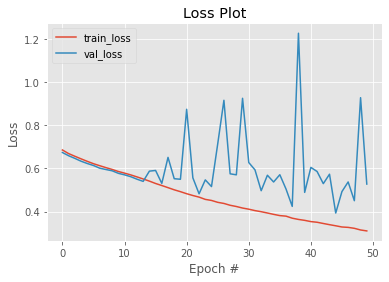

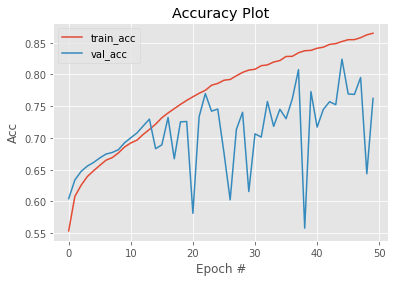

In [ ]:
%matplotlib inline

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), history.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig("100%_S1_LOSS.svg")
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), history.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.savefig("100%_S1_ACC.svg")
plt.show()

### **Train**

In [ ]:
result_train = model.evaluate(train_generator, verbose=1)
print('\n', 'Hasil Akurasi Train:-', result_train[1]," Hasil Loss Train", result_train[0])

2284/2336 [============================>.] - ETA: 5s - loss: 0.4455 - accuracy: 0.7958

### **Validasi**

In [ ]:
result_val = model.evaluate(validation_generator, verbose=1)
print('\n', 'Hasil Akurasi Val:-', result_val[1]," Hasil Loss Val", result_val[0])

584/584 [==============================] - 2546s 4s/step - loss: 0.5277 - accuracy: 0.7623

 Hasil Akurasi Val:- 0.7622845768928528  Hasil Loss Val 0.5276966691017151


### **Confusion Matrix**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true_val = validation_generator.classes
y_pred = np.round(model.predict(validation_generator),0)

print('Confusion Matrix')
print(confusion_matrix(y_true_val, y_pred))

Confusion Matrix
[[5889 3452]
 [ 989 8352]]


### **Classification Report**

In [ ]:
print('Classification Report')

target_names = ['MSI', 'MSS']
print(classification_report(y_true_val, y_pred, target_names=target_names, zero_division=1))

Classification Report
              precision    recall  f1-score   support

         MSI       0.86      0.63      0.73      9341
         MSS       0.71      0.89      0.79      9341

    accuracy                           0.76     18682
   macro avg       0.78      0.76      0.76     18682
weighted avg       0.78      0.76      0.76     18682



### **AUC**

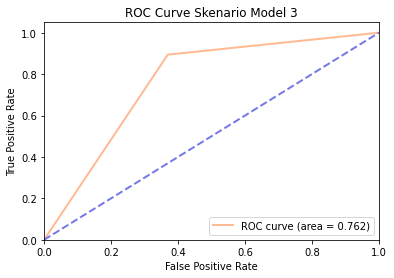

In [ ]:
from sklearn.metrics import  precision_recall_curve, auc, roc_curve

fpr, tpr, _ = roc_curve(y_true_val, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='#ffba93',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#7579e7', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Skenario Model 3')
plt.legend(loc="lower right")
plt.savefig("100%_S1_AUC.svg")
plt.show()

In [ ]:
auc_score = roc_auc_score(y_true_val, y_pred)
fpr, tpr, th = roc_curve(y_true_val, y_pred)
print('AUC Score Skenario Model 1 = ', round(auc_score, 3))

AUC Score Skenario Model 1 =  0.762


## **Save**

In [ ]:
%cd D:/Rifal/Hasil/CRC/S1

D:\Rifal\Model\CRC\Tanpa Augmentasi


In [ ]:
from keras.models import load_model

#Save
model.save('100%_S1.h5') 

In [ ]:
from keras.models import load_model
model = load_model('100%_S1.h5')